In [62]:
# different classifiers: LR, SVM, NB
# different feature extractors: BoW, tf-idf
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

In [63]:
def tfidf_svm(text_data, y_train):
  vectorizer = TfidfVectorizer(max_features=3500,ngram_range=(1,2),max_df=0.8)
  x_train_counts = vectorizer.fit_transform(text_data)
  x_train = x_train_counts.toarray()
  clf = SVC(C=10)
  accuracy = cross_val_score(clf, x_train, y_train, cv=10, scoring='accuracy')
  print("tfidf svm | Accuracy: {0:.3f}".format(np.mean(accuracy)))

def tfidf_lr(text_data, y_train):
  vectorizer = TfidfVectorizer(max_features=3500,ngram_range=(1,2),max_df=0.8)
  x_train_counts = vectorizer.fit_transform(text_data)
  x_train = x_train_counts.toarray()
  clf = LogisticRegression(C=10)
  accuracy = cross_val_score(clf, x_train, y_train, cv=10, scoring='accuracy')
  print("tfidf lr | Accuracy: {0:.3f}".format(np.mean(accuracy)))
    
def tfidf_nb(text_data, y_train):
  vectorizer = TfidfVectorizer(max_features=3500,ngram_range=(1,2),max_df=0.8)
  x_train_counts = vectorizer.fit_transform(text_data)
  x_train = x_train_counts.toarray()
  clf = GaussianNB()
  accuracy = cross_val_score(clf, x_train, y_train, cv=10, scoring='accuracy')
  print("tfidf nb | Accuracy: {0:.3f}".format(np.mean(accuracy)))

In [127]:
def bow_svm(text_data, y_train):
  vectorizer = CountVectorizer(max_features=3500)
  x_train_counts = vectorizer.fit_transform(text_data)
  x_train = x_train_counts.toarray()
  clf = SVC(C=10)
  accuracy = cross_val_score(clf, x_train, y_train, cv=10, scoring='accuracy')
  print("bow svm | Accuracy: {0:.3f}".format(np.mean(accuracy)))

def bow_lr(text_data, y_train):
  vectorizer = CountVectorizer(max_features=3500)
  x_train_counts = vectorizer.fit_transform(text_data)
  x_train = x_train_counts.toarray()
  clf = LogisticRegression(C=10)
  accuracy = cross_val_score(clf, x_train, y_train, cv=10, scoring='accuracy')
  print("bow lr | Accuracy: {0:.3f}".format(np.mean(accuracy)))

def bow_nb(text_data, y_train):
  vectorizer = CountVectorizer(max_features=5000)
  x_train_counts = vectorizer.fit_transform(text_data)
  x_train = x_train_counts.toarray()
  clf = GaussianNB()
  accuracy = cross_val_score(clf, x_train, y_train, cv=10, scoring='accuracy')
  print("bow nb | Accuracy: {0:.3f}".format(np.mean(accuracy)))

In [64]:
star_path = '/Users/vivian/data-mining/processed/star.txt'
review_path = '/Users/vivian/data-mining/processed/review.txt'

root_path = '/Users/vivian/data-mining/processed/'
count = ['6000','7000','8000','9000','10000']
stars_list = ['6000_star.txt','7000_star.txt','8000_star.txt','9000_star.txt','10000_star.txt']
reviews_list = ['6000_review.txt','7000_review.txt','8000_review.txt','9000_review.txt','10000_review.txt']

for idx,item in enumerate(stars_list):
    star_path = root_path + stars_list[idx]
    review_path = root_path + reviews_list[idx]

    label = open(star_path).read().splitlines()
    data = open(review_path).read().splitlines()
    
    print(count[idx])
    tfidf_svm(data, label)
    tfidf_lr(data, label)
    tfidf_nb(data, label)

6000
tfidf svm | Accuracy: 0.407
tfidf lr | Accuracy: 0.506
tfidf nb | Accuracy: 0.318
7000
tfidf svm | Accuracy: 0.420
tfidf lr | Accuracy: 0.509
tfidf nb | Accuracy: 0.303
8000
tfidf svm | Accuracy: 0.416
tfidf lr | Accuracy: 0.509
tfidf nb | Accuracy: 0.312
9000
tfidf svm | Accuracy: 0.410
tfidf lr | Accuracy: 0.515
tfidf nb | Accuracy: 0.316
10000
tfidf svm | Accuracy: 0.407
tfidf lr | Accuracy: 0.526
tfidf nb | Accuracy: 0.323


In [65]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from scipy.stats.stats import pearsonr
from scipy.stats.mstats import spearmanr
from scipy.stats import kendalltau

In [77]:
review_path = '/Users/vivian/data-mining/processed/5000_review.txt'
data = open(review_path).read().splitlines()

vectorizer = TfidfVectorizer(max_features=3500,ngram_range=(1,2),max_df=0.8)
x_train_counts = vectorizer.fit_transform(data)
x_train = x_train_counts.toarray().tolist()

# change to int
label = [int(i) for i in label]

X_train = x_train[:4000]
y_train = label[:4000]
X_test = x_train[4000:]
y_test = label[4000:]

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
#y_pred = regr.predict(X_test).tolist()
y_pred = regr.predict(X_test)
print(y_pred.shape)
print(len(y_test))

pearson = pearsonr(y_test, y_pred)
spearman = spearmanr(y_test, y_pred)
kendall = kendalltau(y_test, y_pred)

print('tfidf vectorizer')
print('pearson coeff: {}'.format(pearson[0]))
print('spearman coeff: {}'.format(spearman.correlation))
print('kendall coeff: {}\n'.format(kendall.correlation))

pca = PCA(n_components=2)
pca.fit(x_train)
transform_data = pca.transform(x_train)

allindex = []
for line in open(star_path):
    allindex.append(line.strip().split()[0])

# change to int
allindex = [int(i) for i in allindex]    

starDict = {}
for i in range(1,6):
    starDict[i] = [[],[]]

for i in range(len(transform_data)):
    rate = allindex[i]
    point = transform_data[i]
    starDict[rate][0].append(point[0])
    starDict[rate][1].append(point[1])

plt.scatter(starDict[1][0],starDict[1][1],color='r',s=2,label = '1')
#plt.scatter(starDict[2][0],starDict[2][1],color='b',s=2,label = '2')
#plt.scatter(starDict[3][0],starDict[3][1],color='y',s=2,label = '3')
#plt.scatter(starDict[4][0],starDict[4][1],color='k',s=2,label = '4')
plt.scatter(starDict[5][0],starDict[5][1],color='c',s=2,label = '5')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='1')
plt.show()

(1000,)
6000


ValueError: operands could not be broadcast together with shapes (6000,) (1000,) 

1200
1200
6000
tfidf vectorizer
pearson coeff: -0.03428223684748749
spearman coeff: 0.23096030086752564
kendall coeff: 0.17728233114334296



/Users/vivian/anaconda/lib/python3.6/site-packages/matplotlib/legend.py:326: UserWarning: Unrecognized location "1". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  six.iterkeys(self.codes))))


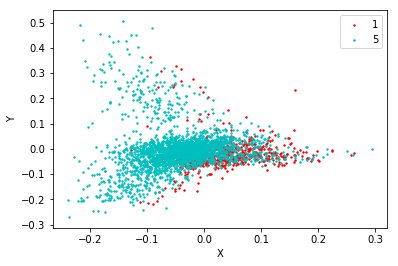

1400
1400
7000
tfidf vectorizer
pearson coeff: -0.027951733151547958
spearman coeff: 0.3750171110813068
kendall coeff: 0.29362333466953716



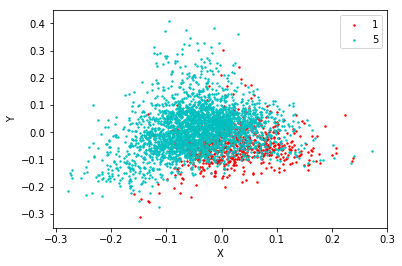

1600
1600
8000
tfidf vectorizer
pearson coeff: -0.004292080918125619
spearman coeff: 0.23565394861714448
kendall coeff: 0.17533275066348672



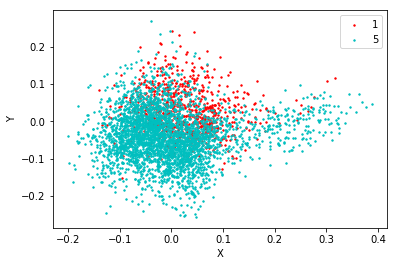

1800
1800
9000
tfidf vectorizer
pearson coeff: -0.036384169885848354
spearman coeff: 0.1551198104063374
kendall coeff: 0.11534479508649609



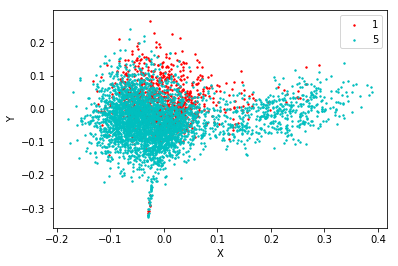

2000
2000
10000
tfidf vectorizer
pearson coeff: -0.07152111687294359
spearman coeff: 0.4906637214216665
kendall coeff: 0.3763027111587814



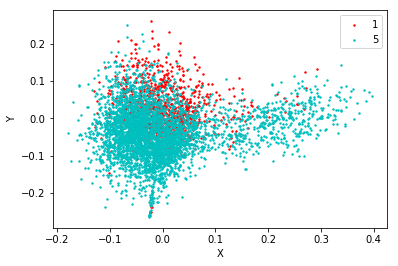

In [82]:
root_path = '/Users/vivian/data-mining/processed/'
count = ['6000','7000','8000','9000','10000']
train = [4800,5600,6400,7200,8000]
stars_list = ['6000_star.txt','7000_star.txt','8000_star.txt','9000_star.txt','10000_star.txt']
reviews_list = ['6000_review.txt','7000_review.txt','8000_review.txt','9000_review.txt','10000_review.txt']

for idx,item in enumerate(stars_list):
    star_path = root_path + stars_list[idx]
    review_path = root_path + reviews_list[idx]

    label = open(star_path).read().splitlines()
    data = open(review_path).read().splitlines()
    
    vectorizer = TfidfVectorizer(max_features=3500,ngram_range=(1,2),max_df=0.8)
    x_train_counts = vectorizer.fit_transform(data)
    x_train = x_train_counts.toarray().tolist()

    # change to int
    label = [int(i) for i in label]

    limit = train[idx]
    #print(limit)
    X_train = x_train[:limit]
    y_train = label[:limit]
    X_test = x_train[limit:]
    y_test = label[limit:]

    regr = linear_model.LinearRegression()
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    print(len(y_pred))
    print(len(y_test))

    pearson = pearsonr(y_test, y_pred)
    spearman = spearmanr(y_test, y_pred)
    kendall = kendalltau(y_test, y_pred)
    print(count[idx])
    print('tfidf vectorizer')
    print('pearson coeff: {}'.format(pearson[0]))
    print('spearman coeff: {}'.format(spearman.correlation))
    print('kendall coeff: {}\n'.format(kendall.correlation))

    pca = PCA(n_components=2)
    pca.fit(x_train)
    transform_data = pca.transform(x_train)

    allindex = []
    for line in open(star_path):
        allindex.append(line.strip().split()[0])

    # change to int
    allindex = [int(i) for i in allindex]    

    starDict = {}
    for i in range(1,6):
        starDict[i] = [[],[]]

    for i in range(len(transform_data)):
        rate = allindex[i]
        point = transform_data[i]
        starDict[rate][0].append(point[0])
        starDict[rate][1].append(point[1])

    plt.scatter(starDict[1][0],starDict[1][1],color='r',s=2,label = '1')
    #plt.scatter(starDict[2][0],starDict[2][1],color='b',s=2,label = '2')
    #plt.scatter(starDict[3][0],starDict[3][1],color='y',s=2,label = '3')
    #plt.scatter(starDict[4][0],starDict[4][1],color='k',s=2,label = '4')
    plt.scatter(starDict[5][0],starDict[5][1],color='c',s=2,label = '5')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend(loc='1')
    plt.show()

In [131]:
allindex

['5',
 '3',
 '3',
 '4',
 '5',
 '5',
 '4',
 '4',
 '4',
 '4',
 '4',
 '3',
 '4',
 '4',
 '5',
 '3',
 '1',
 '4',
 '5',
 '3',
 '3',
 '1',
 '5',
 '4',
 '1',
 '2',
 '5',
 '5',
 '4',
 '2',
 '3',
 '1',
 '2',
 '3',
 '5',
 '2',
 '4',
 '4',
 '3',
 '4',
 '4',
 '3',
 '1',
 '5',
 '4',
 '3',
 '1',
 '2',
 '5',
 '2',
 '3',
 '2',
 '4',
 '5',
 '5',
 '5',
 '3',
 '4',
 '4',
 '4',
 '1',
 '5',
 '2',
 '3',
 '5',
 '4',
 '4',
 '5',
 '2',
 '5',
 '5',
 '4',
 '2',
 '3',
 '4',
 '2',
 '5',
 '5',
 '5',
 '4',
 '1',
 '1',
 '2',
 '4',
 '5',
 '4',
 '1',
 '5',
 '1',
 '4',
 '4',
 '5',
 '4',
 '5',
 '5',
 '3',
 '5',
 '3',
 '1',
 '4',
 '5',
 '2',
 '3',
 '5',
 '5',
 '5',
 '3',
 '3',
 '1',
 '3',
 '5',
 '4',
 '3',
 '4',
 '2',
 '4',
 '5',
 '5',
 '1',
 '3',
 '4',
 '5',
 '4',
 '1',
 '5',
 '4',
 '4',
 '5',
 '4',
 '3',
 '1',
 '5',
 '5',
 '3',
 '5',
 '3',
 '3',
 '5',
 '5',
 '3',
 '4',
 '5',
 '4',
 '4',
 '5',
 '5',
 '3',
 '4',
 '4',
 '4',
 '4',
 '2',
 '3',
 '4',
 '4',
 '4',
 '2',
 '4',
 '4',
 '5',
 '4',
 '3',
 '5',
 '4',
 '5',
 '4',
 '3'

In [60]:
# creates fixed dataset
import json
from pprint import pprint

path = '/Users/vivian/data-mining/dataset/review10000.json'

data = []
for line in open(path, 'r'):
    data.append(json.loads(line))
  
for idx,i in enumerate(range(6000)):
    with open("/Users/vivian/data-mining/processed/6000_review.txt", "a") as f1:
        tmp = data[idx]['text']
        d = ' '.join(tmp.split())
        #print(d)
        f1.write(d)

    with open("/Users/vivian/data-mining/processed/6000_star.txt", "a") as f2:
        d = str(data[idx]['stars']) + '\n'
        f2.write(d)

My girlfriend and I stayed here for 3 nights and loved it. The location of this hotel and very decent price makes this an amazing deal. When you walk out the front door Scott Monument and Princes street are right in front of you, Edinburgh Castle and the Royal Mile is a 2 minute walk via a close right around the corner, and there are so many hidden gems nearby including Calton Hill and the newly opened Arches that made this location incredible. The hotel itself was also very nice with a reasonably priced bar, very considerate staff, and small but comfortable rooms with excellent bathrooms and showers. Only two minor complaints are no telephones in room for room service (not a huge deal for us) and no AC in the room, but they have huge windows which can be fully opened. The staff were incredible though, letting us borrow umbrellas for the rain, giving us maps and directions, and also when we had lost our only UK adapter for charging our phones gave us a very fancy one for free. I would 

First and foremost, I seriously love this place! First look: The whole place has a very cool, very inviting vibe. The decor (industrial, rustic wood mixed with some seriously cool and unique art) hangout areas (sweet beer garden), lighting that makes everyone look pretty/handsome (with or without beer goggles) and a window looking into the brewery operation. These features make it a really special place. Even the restrooms are rad. It looks like a lot of love went into every detail. The Beer: This is a true tasting room. I equate it to going to your favorite wine tasting room and enjoying the various types of wine, except it's delicious beer (obviously). (e.g.; the Nines, you gotta try the Nines!). What it is not is a pub or a sports bar with super loud people, Budweiser and NFL whistles blowing from 50 TV screens...which is refreshing. I feel a person just starting to develop their beer palette would feel right at home bellying up to the bar along side a person with a honed, mature be

Excellent service & food. I had the grilled salmon & my husband had the muffuletta sandwich. Yum!
Terrible. Had reservations. Not busy. Hostess was clueless. Left us at restaurant bar and kept seating people with no reservations. Talked to hostess, did not care. Never seated us. Wont be back.
I came here last night while on a business trip. I was not too impressed. The food was decent but the service not so much. We sat on the outdoor terrace and the waitress forgot about us. For appetizers we ordered the calamari which was light and delicious. We also had the shrimp and gnocchi (only came with 3 pieces of shrimp) and the wings which were good but nothing special. I ordered the fried chicken confit which was good but not as flavorful as I had expected. It's conveniently located in the hotel but next time I'll venture out into the city.
Chose to visit the new Hilton Downtown and new restaurant for a birthday. Chose this restaurant because our party had been to most restaurants in Clevel

had never been... not worth the walk! it was a fun experience since it's one of those places made famous by the movies, but not something I could imagine ever craving.
Went today around 3:30 and was only in line for about 30 min. The employees were so nice, and didn't seem stressed at all considering the craziness they've gone through these past few days. They taste just like NY, brings back a lot of memories. The only downfall is the price, they range from $1.10-$1.50 each. NY is like half the price.
Typical franchise location that created a ton of hype only to disappoint with frozen disgusting meat and a dirty and extremely crowded dining room. The meat was just more like a thinly slice of roast beef that lacks flavor.
After walking up and down the Strip twice I was craving some White Castle almost as much as Roldy and Kumar! From the outside it looked like a tiny standalone but actually the location is inside the Casino Royale. Got the #7 Castle Pack, which was 10 sliders, two regul

I can't believe I haven't wrote a review for this place yet. So people living in the west coast knows we don't have this we have in n out. Omgosh I won't choose sides I love them both. They're different! White Castle is delicious mini bite sliders. The first time I went I was dumb I got 3 regret it so much and was too lazy to walk the strip from my hotel to get it lol. The last time I went 6 with fries and a milkshake. So good. Do it!
We decided to try this place since it was a short walk from our hotel. Located next to Harrah's casino, this place has several guards to ensure nobody cuts in line. Depending on the time of day, you might encounter a line of people waiting outside. We came here at 6 pm on a Monday evening - a short line of 5 people formed outside; when we left 45 min later, the line was around 20 people outside. Once you're inside, it's another 10-15 people. It took us about 30 min to get our food. Once you place your order, you are given a number, and once your food is r

I enjoyed all the bier at OMB. Great German style heritage brews. The food was good but no there's a no non-sense take on the service with paper plates & plastic cutlery. Little disappointed they didn't have soft pretzels, they were out of stock, on a early Saturday evening... The one non-beer drinking guest in our party was also disappointed she was never offered the chance to have a glass of wine,which is available. We'll give it a second chance when it's convienient and
Oh. Wow, there's breweries in Charlotte. Who knew?! Well, this was my first time here and was I surprised. When we first got here I noticed the nice wood fire they had going out in the front, but sadly we could not enjoy it because there was a lot of wind and smoke flying all over the place. Going inside there was a lot of flags hanging down from the tall ceilings, which I really enjoyed, and in the back stood the brewery itself. I got a couple of drinks and sat down with my friends. During the middle of our discussi

I have been to this place three times and each time the service has gotten worse not better. Today they advertise five dollar pizza and they will claim they charged us 12 each I asked for balsamic vinegar and waited 30 minutes I will give this place one more try
I am a local and I have been on the hunt for the perfect Italian eatery. I FOUND IT! I was invited by an Italian family to join them for a late supper. Surprisingly they have a $5 menu. I ordered Artichoke Bruschetta and a small hand made pizza at $5 each. I would have paid more!!! Guys this is the REAL DEAL. Real and authentic Italian food. Wonderful vibe and awesome servers. I will definitely be back with my family. Thanks for a truly enjoyable dining experience.
I've had a lot of pizza from a lot of places, but settebello surpasses all of them. It is NOT like dominoes or Pizza Hut, and I mean that in a good way. everything is ridiculously well made and still comes out fast. It's perfect for a date or grabbing some beers and 

A good stop if you're cruising the Mont-Royal district, it's bright and colorful, you cannot miss it! Good food, nice portions, and super cheap- I love this place, just can't be beat!
Non pretentious, amazing food & friendly service! The staff is very cool & has good recommendations. Poutine is definitely the star on the menu!
Great late night spot if you're feeling for some greasy food after a night of drinking. Located on St Laurent and the venue is quite tiny. Can only sit an average of 8 to 10 people at a time. Most people do take out though. I came here for the sole purpose of poutine!! Definitely enjoyed it. Fries were thin cut and the curds were extra squeaky. The gravy is on the little salter side but definitely worth the calories here! For 6$ before tax you get a whooping amount of poutine. Servers and owner are also super friendly guys
The poutine is obviously highly recommended here, but other reviews tend to downplay the other food on the menu. This was my first poutine exp

We went to Nadia's for some kind of special occasion about 5 years ago. I dont remember anything being particularly dirty, like a previous reviewer said. I do remember the huge fish tank., but not the TVs. The fish tank wasn't dirty when we were there, though we do agree it did give a Miami Vice kinda vibe, haha. The service was very good. The food was bland, other than salt , sugar, and butter. By this chriteria, I agree it was way overpriced. Exotic varieties of fish etc, but if you want monkfish, baked in butter, etc it's abailable fresh at seafood center, and very easy to cook at home. The walk up the stairway to enter was kinda weird, but overlookable. I enoyed the character of the old brick building.
A Hole...yes. Cheap...yes. Fun...you bet! We went immediately following a meal at the Peppermill, otherwise I was planning on ordering a half-pound hot dog for a buck and a half...I was disheartened to learn that only a year ago, the half-pound dog was only 99 cents. How times have c

Almost a year since Shaving Grace became my go to shop in Scottsdale. Added a shave to my monthly visit - fantastic! Boris and the guys at Shaving Grace get it. Best haircut and shave experience, far exceeds anything I found while living downtown Chicago.
Great barbershop. I generally roll in about every 2 weeks to get my beard trimmed and I have had nothing but great experiences and results. I trust everyone in there for the trim, not just one person in particular. Good atmosphere, good pricing and always quick. I would recommend highly.
I love this place! Boris is amazing, he's very attention to detail. Boris also employed great barbers too. Every time I come in I get a great haircut and the price is reasonable. I highly recommend this place if you want a quality cut.
This was my second time at Shaving Grace and I am thoroughly satisfied with my haircut, beard trim, and shave. Boris is easily the best barber I have ever used.
I greatly appreciate you trying to cover up your lack of c

The food here is consistently good, but let's face it ladies...if you've lived near downtown Scottsdale for a while, you've heard about the hot waitstaff. They even had their own calendar for a couple years! Sadly, on a recent birthday outing with 4 other girls, we were disappointed to find that the hot young boys were nowhere in sight (no offense to the fine waiters that do work there). That's the real reason we chose Brioni's, as there are other places to get good Italian food if that's what you're after. Granted, it may be that the boys had the night off for their other job with the Chippendales, but I doubt it. We were there on a Friday night, and they seated us in a room I didn't know existed (the place is huge, with several rooms), not in the bar area where I'd had good times in the past. The service was good, although the corner where we were seated smelled like old wood...? It seems the crowd here has aged a bit as well..not that there's anything wrong with that...but it was mo

All I can say is "WOW" the ceviche was super delish. I've tried a few peruvian places in the past and El Chullo wins in my book. I tried both the ceviche mixto & the ceviche with fish and they are both amazing dishes. I really liked the flavors. I also had lomo saltado and same thing the flavors were soooo good. This is my new favorite restaurant. Enjoy!
My husband and I saw the reviews on this place we are from California visting here for the weekend so we decided to give it a try the food was delicious The service was ok our waitress disappeared for a while I was thirsty and my 2 year old wanted water I asked another waitress for a cup of water and she did but wasnt to kind like if it bothered her she was extra kind with everyone else plus my water had some green stuff in it
Exquisite, finger licking good Peruvian food! The best Peruvian food I've ever had outside of Peru. Great cozy ambiance, friendly staff, and good service. The food brought up memories of my grandmother's restaura

In [47]:
data[9999]

{'business_id': 'yRk8ezAFV59HDHsuHiiU6Q',
 'cool': 0,
 'date': '2014-04-17',
 'funny': 0,
 'review_id': 'EiqddB0ncQhEZDupG5c6fw',
 'stars': 1,
 'text': 'They got our order wrong twice, we had to walk all the way back to get the food right the second time it was made incorrectly.',
 'useful': 0,
 'user_id': 'oAIcFvWMDkyzfCyHHPOK3A'}